In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

# Dataset Selection and Initial Analysis

In [2]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EDA on iris data

In [4]:
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

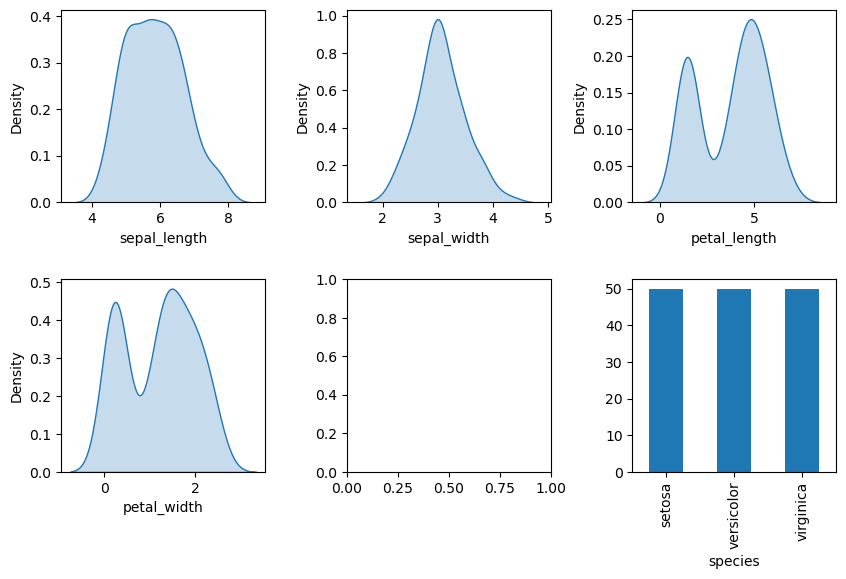

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(iris_data.columns):
    if iris_data[col].dtype == 'object':
        iris_data[col].value_counts().plot(kind='bar')
    else:
        sns.kdeplot(iris_data[col], ax=axes[i], fill=True)
    
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

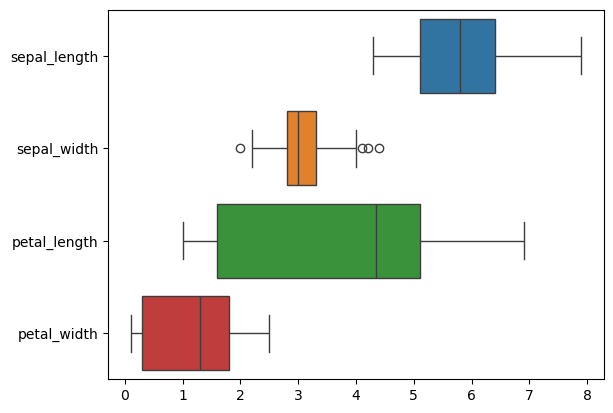

In [10]:
sns.boxplot(iris_data, orient='h')
plt.show()

In [11]:
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

EDA on customer data

In [12]:
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
customer_data['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6104\3397677082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_6104\3397677082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_da

In [14]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
customer_data[features] = scaler.fit_transform(customer_data[features])

# Implementing Clustering Algorithms

k-means clustering on iris data

In [15]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(iris_data)
labels = kmeans.labels_

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


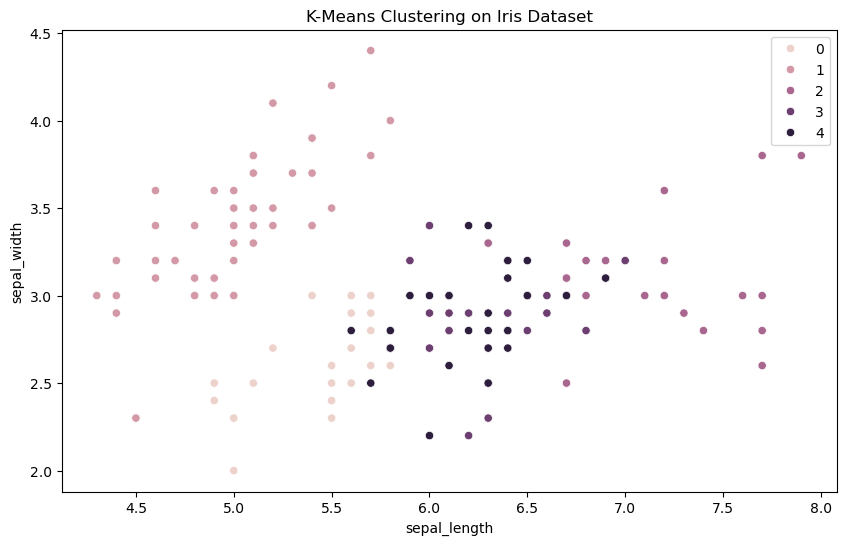

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_data.iloc[:, 0], y=iris_data.iloc[:, 1], hue=labels)
plt.title('K-Means Clustering on Iris Dataset')

plt.show()

Determine the optimal number of clusters on iris data

In [19]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(iris_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(iris_data, kmeans.labels_))

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day

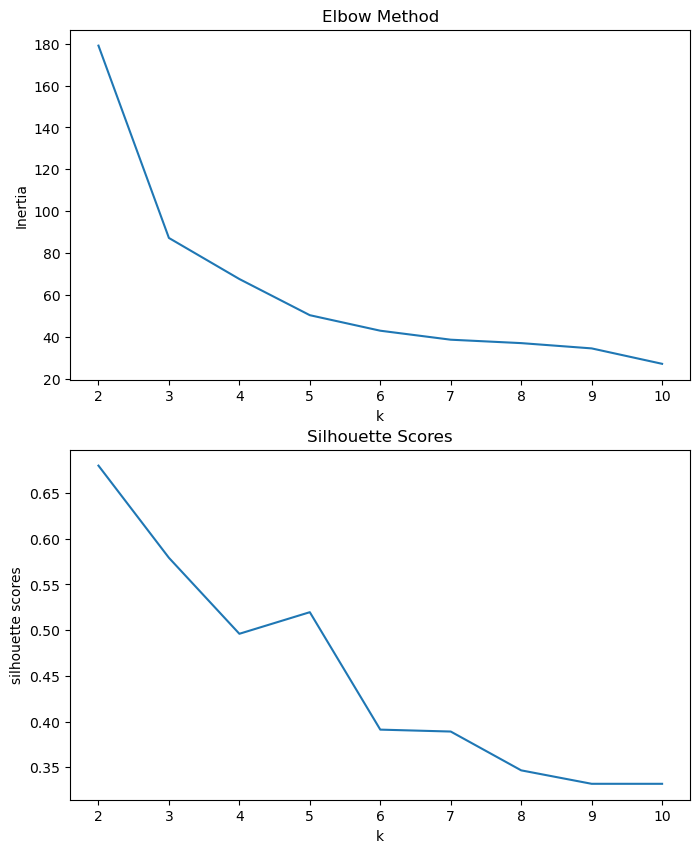

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes = axes.flatten()
axes[0].plot(k_range, inertias)
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Inertia')
axes[1].plot(k_range, silhouette_scores)
axes[1].set_title('Silhouette Scores')
axes[1].set_xlabel('k')
axes[1].set_ylabel('silhouette scores')

plt.show()

k-means clustering on customer data

In [21]:
kmean = KMeans(n_clusters=5, random_state=42)
kmean.fit(customer_data)
labels = kmean.labels_

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


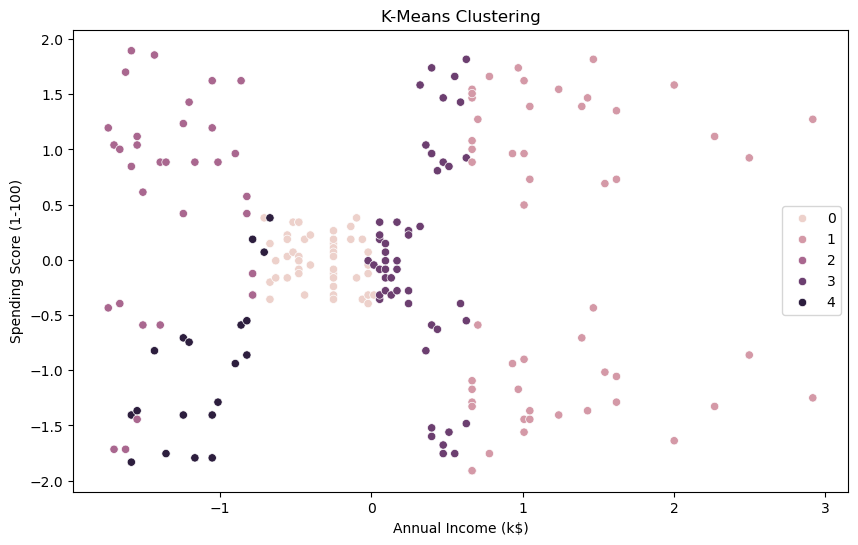

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data.iloc[:, 3], y=customer_data.iloc[:, 4], hue=labels)
plt.xlabel(customer_data.columns[3])
plt.xlabel(customer_data.columns[3])
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Determine the optimal number of clusters on customer data

In [23]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(customer_data, kmeans.labels_))

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day

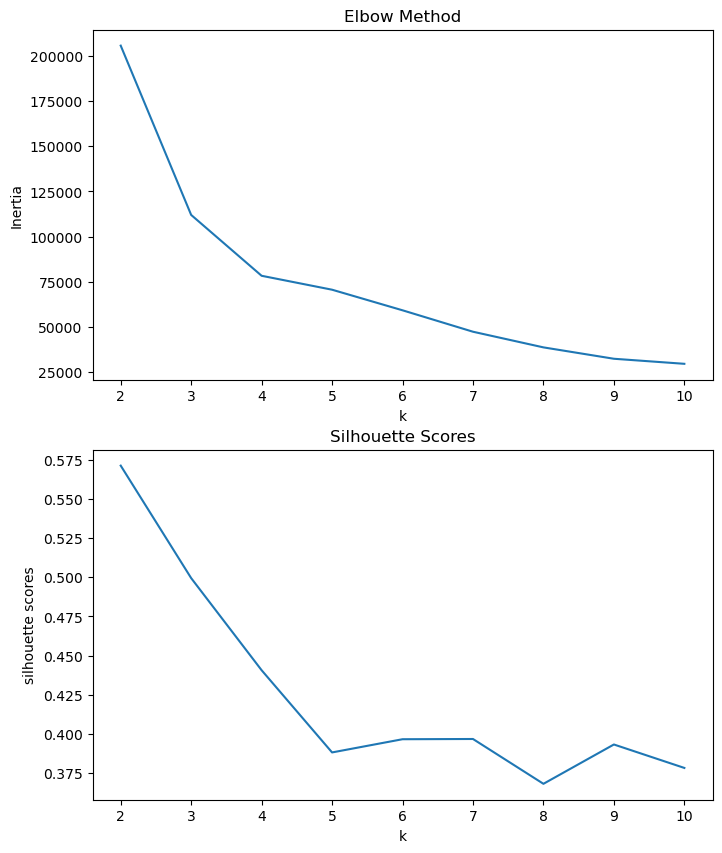

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes = axes.flatten()
axes[0].plot(k_range, inertias)
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Inertia')
axes[1].plot(k_range, silhouette_scores)
axes[1].set_title('Silhouette Scores')
axes[1].set_xlabel('k')
axes[1].set_ylabel('silhouette scores')

plt.show()

 Hierarchical Clustering on iris data

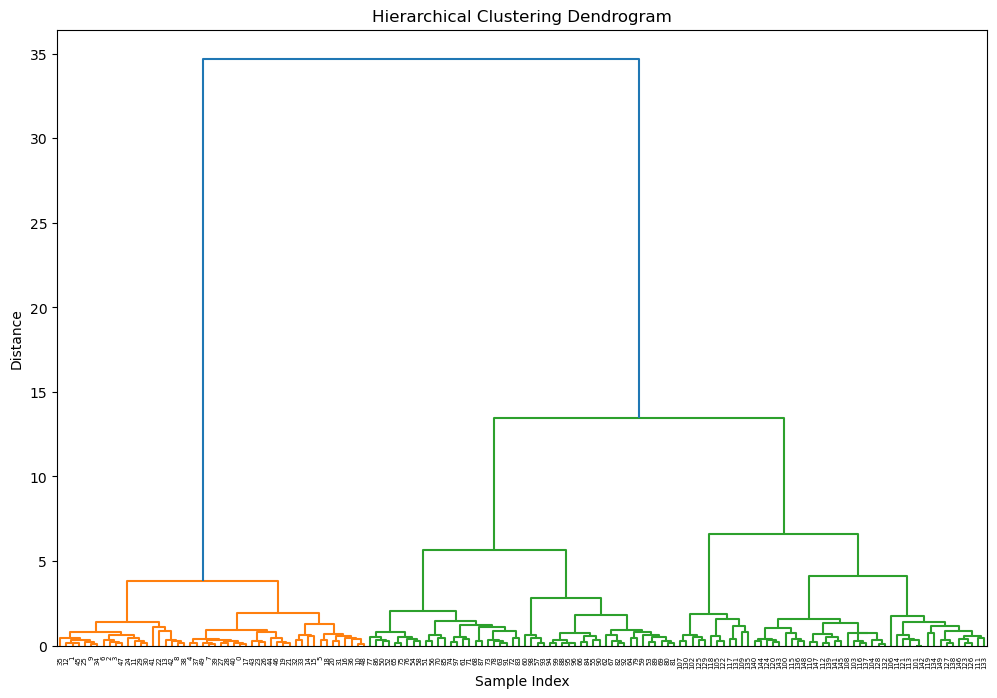

In [25]:

linkage_matrix = linkage(iris_data, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [27]:
 Hierarchical Clustering on customer data

SyntaxError: invalid syntax (1858173964.py, line 1)

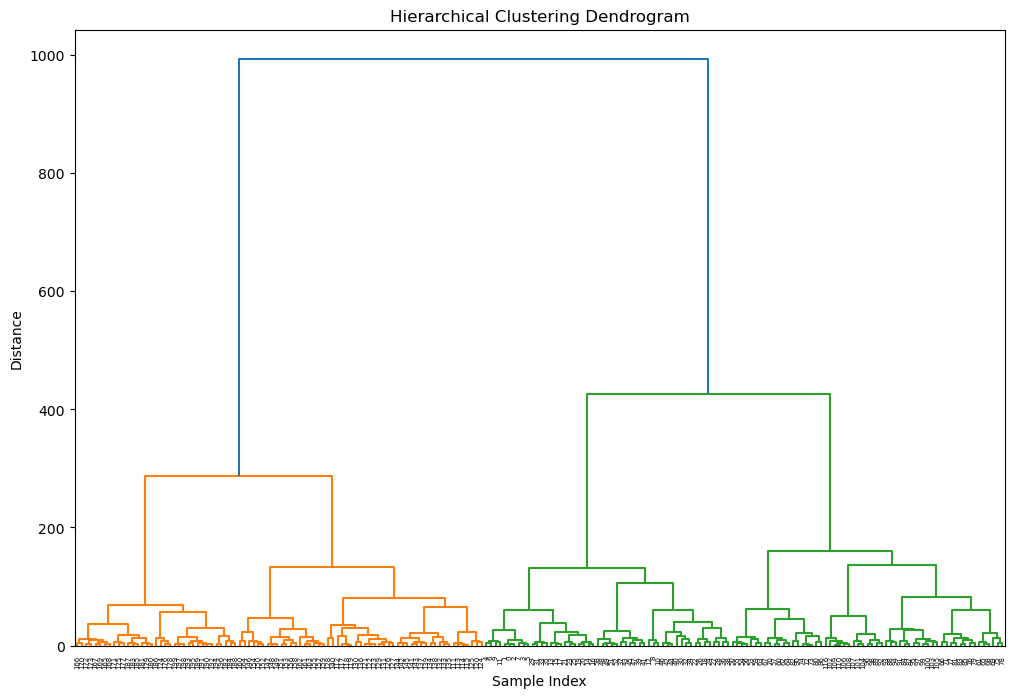

In [26]:

linkage_matrix = linkage(customer_data, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()